Also try facebook prophet. 
Have to find how to choose the parameters of SARIMA

SARIMA (Seasonal ARIMA): Extends ARIMA to handle seasonality.

Exponential Smoothing: Suitable for data with trend and seasonality.
Simple Exponential Smoothing: Suitable for data without trend or seasonality.
Holt’s Linear Trend Model: Suitable for data with a trend but no seasonality.
Holt-Winters Seasonal Model: Suitable for data with trend and seasonality.

3. Identify ARIMA Parameters (p, d, q)
p (AR term): The lag of the autoregressive model. Look for the lag value where the PACF plot cuts off to zero.
d (Difference order): Since your data is already stationary, d should be 0.
q (MA term): The lag of the moving average model. Look for the lag value where the ACF plot cuts off to zero.
4. Identify Seasonal Parameters (P, D, Q, s)
P (Seasonal AR term): The lag of the seasonal autoregressive model. Look for the seasonal lag value in the PACF plot.
D (Seasonal difference order): If there's seasonal variation that’s not stationary, use seasonal differencing (e.g., daily seasonality might require a lag of 1 day). In your case, D is likely 1.
Q (Seasonal MA term): The lag of the seasonal moving average model. Look for the seasonal lag value in the ACF plot.
s (Seasonal period): The number of periods in one seasonal cycle. For daily seasonality, s would be 24 for hourly data or 7 for weekly data.

Identify Parameters
From the ACF and PACF plots, you might determine:
p (AR term): 1 (based on PACF cutoff)
d (Difference order): 0 (data is stationary)
q (MA term): 1 (based on ACF cutoff)
P (Seasonal AR term): 1 (based on seasonal PACF)
D (Seasonal difference order): 1 (to account for daily seasonality)
Q (Seasonal MA term): 1 (based on seasonal ACF)
s (Seasonal period): 24 (for hourly data with daily seasonality)

Stationarity: Your data is already stationary (p-value 0.0 in ADF test).
ARIMA parameters: Identify p and q from PACF and ACF plots.
Seasonal parameters: Identify P, D, Q, and s from seasonally differenced ACF and PACF plots.

Learn how to interpret autocorrelation and partial autocorrelation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
data = pd.read_csv("times_series_data_no_labels.csv" ,
    index_col='datetime',
    parse_dates=['datetime']
    )
data.describe()

,data_0,data_1
count,51840.000000,51840.000000
mean,27.428187,27.427566
std,4.276855,4.281787
min,16.042714,16.342305
25%,23.792250,23.832418
50%,29.712173,29.709107
75%,30.188862,30.189345
max,41.066048,41.122645


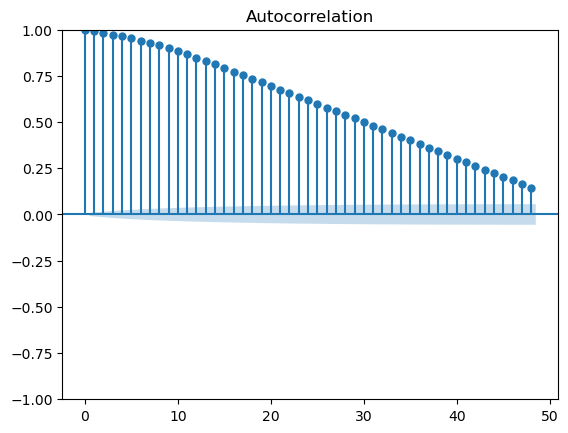

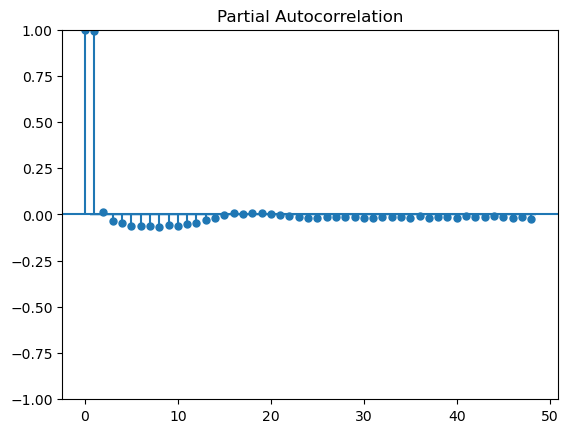

In [3]:
ts = data['data_0'].asfreq('5min')
result = adfuller(ts)
if result[1] > 0.05:
    ts = ts.diff().dropna()

# Plot ACF and PACF
plot_acf(ts)
plot_pacf(ts)
plt.show()


The autocorrelation plot you provided indicates the presence of a significant trend in the time series data. Here’s a detailed interpretation:

Strong Positive Autocorrelation: The autocorrelation values are close to 1 for smaller lags and gradually decrease as the lag increases. This suggests that the data points in the series are highly correlated with their previous values, indicating a strong trend component.

Gradual Decline: The autocorrelation values decline gradually, which is characteristic of a time series with a strong trend or persistence over time. This means that past values have a strong influence on future values, and the series does not quickly revert to the mean.

Non-randomness: The consistent and slowly declining autocorrelation values indicate that the time series is not random. There is a discernible pattern or structure in the data.

Trend Detection: This pattern is often seen in time series data that exhibit a trend. It suggests that the series is non-stationary, and differencing or detrending might be necessary to achieve stationarity before further analysis or modeling.

Implications for Modeling
Given this autocorrelation pattern, here are a few implications for modeling the time series data:

Differencing: Applying differencing (e.g., first differencing) to the series might help in achieving stationarity, which is often required for time series modeling techniques like ARIMA.
Trend Component: Consider including a trend component in your time series model to account for the persistent trend observed in the data.
AR Models: Autoregressive models might be appropriate, but ensure that you address the non-stationarity through differencing or transformation.

The partial autocorrelation plot (PACF) you provided gives us additional insights into the time series data, especially regarding the autoregressive (AR) order.

Interpretation of the PACF Plot
Significant Lags: The plot shows significant spikes at lag 1 and possibly lag 2, with the values dropping off to near zero afterwards. This suggests that the first and second lag terms are significantly correlated with the current value of the time series, but beyond that, the partial autocorrelation is negligible.

Order of AR Model: The significant spikes at the initial lags and the rapid decline to near zero indicates that an AR(2) model might be appropriate for this time series. This means that the current value of the series is well explained by the two most recent past values.

Non-randomness and Stationarity: The significant autocorrelations at the first lags confirm the presence of a structure in the time series. Since the PACF cuts off after a few lags, it suggests that if the series is made stationary (possibly by differencing), an AR model might be suitable.

Steps for Further Analysis
Given these observations from both the ACF and PACF plots:

Stationarity Check: Verify the stationarity of the time series using tests like the Augmented Dickey-Fuller (ADF) test. If non-stationary, apply differencing.
Model Selection: Consider fitting an AR(2) model based on the PACF plot. If the series is non-stationary, apply differencing before fitting the model.
Model Diagnostics: After fitting the model, perform diagnostics to check the residuals for white noise and ensure no patterns remain.

ACF Plot:
The ACF plot shows a gradual decline, indicating a possible AR process.
PACF Plot:
The PACF plot shows significant spikes at lags 1 and 2 and then cuts off, suggesting an AR process.

Choosing Parameters:
ARIMA Parameters (p, d, q):
p (AR term): The significant spikes at lags 1 and 2 in the PACF plot suggest that 
p=2.
d (Difference order): Since the series is stationary (as per the ADF test), 
d=0.
q (MA term): The ACF plot suggests a gradual decline, which is indicative of an AR process, but for the sake of completeness, we might start with 
q=0 and adjust if needed.

Seasonal Parameters (P, D, Q, s):
P (Seasonal AR term): Based on the ACF and PACF, let's start with 
P=1.
D (Seasonal difference order): Since there's daily seasonality, 
D=1.
Q (Seasonal MA term): Start with 
Q=0.
s (Seasonal period): For daily seasonality in hourly data, 
s=288.


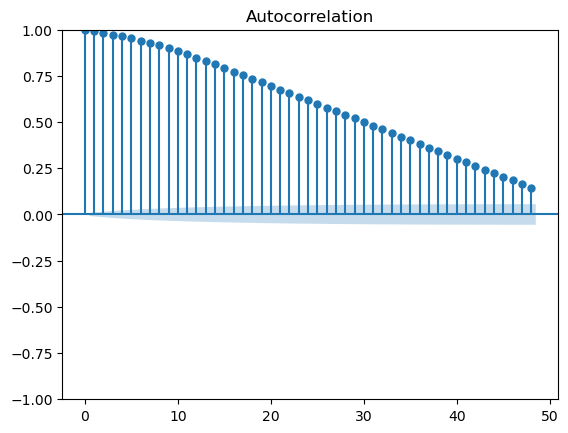

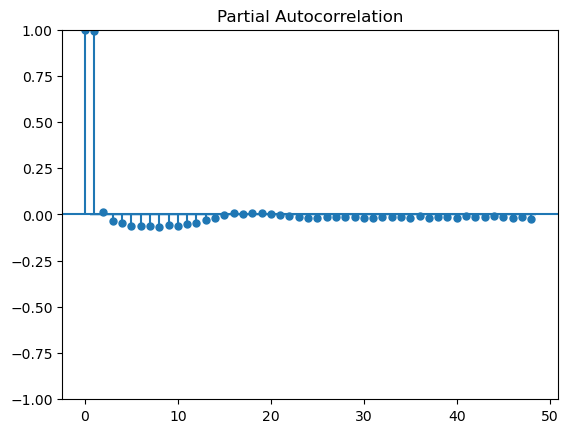

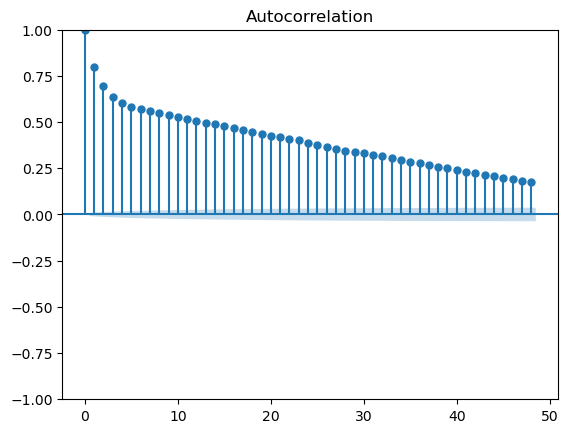

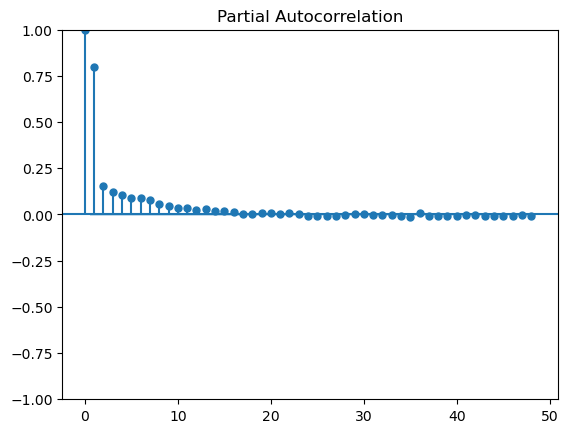

In [4]:
# Plot ACF and PACF for original data
plot_acf(ts)
plot_pacf(ts)
plt.show()

# Seasonal differencing
ts_seasonal_diff = ts.diff(288).dropna()

# Plot ACF and PACF for seasonally differenced data
plot_acf(ts_seasonal_diff)
plot_pacf(ts_seasonal_diff)
plt.show()

In [ ]:
ts_test = ts[-11840:]
ts = ts[:-11840]

In [ ]:
# Fit SARIMA model
p, d, q = 2, 0, 0
P, D, Q, s = 1, 1, 0, 288  # s = 288 for daily seasonality in 5-minute intervals


ts = ts[:-1000]
model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=True)
print(results.summary())

# Diagnostics

results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecast
forecast = results.get_forecast(steps=11840)
forecast_ci = forecast.conf_int()

Start with the identified parameters and evaluate the model.
Check the residuals from the diagnostics plot; they should be white noise.
If necessary, iterate by adjusting the ARIMA and seasonal parameters based on model diagnostics and performance metrics.